In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Constants
q_e = 1.6e-19      # Charge of an electron [C]
d = 0.00766        # separation of the plates in the droplet viewing chamber [m]
rho = 886          # density of oil [kg/m^3]
g = 9.8            # acceleration of gravity [m/s^2]
eta = 1.8320e-5    # viscosity of air in [N•s / m^2]
b = 8.20e-3        # constant, equal to 8.20 x 10-3 [Pa • m]
p = 101325         # barometric pressure [Pa]
V = 500            # potential difference across the plates [V]

# Lists for Input and Outputs - velocity of fall [m/s], velocity of rise [m/s], calculated charges [C], integer multiple of q_e, Drop Name
v_f,v_r,charge,multi,Name = [None]*8,[None]*8,[None]*8,[None]*8,[None]*8

# Measured Data and label, Averaged rise and fall velocities
v_r[0],v_f[0],Name[0]=0.00005686125853,0.00002582496413,"Drop 1"
v_r[1],v_f[1],Name[1]=0.0001653065969,0.00001705087983,"Drop 2"
v_r[2],v_f[2],Name[2]=0.0001484834123,0.00002040316657,"Drop 3"
v_r[3],v_f[3],Name[3]=0.0001226993865,0.00001224739743,"Drop 4"
v_r[4],v_f[4],Name[4]=0.0000852049986, 0.00003351655718,"Drop 5"
v_r[5],v_f[5],Name[5]=0.00006438761498,0.00001940617116,"Drop 5 (I)" # Ionized
v_r[6],v_f[6],Name[6]=0.0001856635672, 0.00004099704821,"Drop 6"
v_r[7],v_f[7],Name[7]=0.00007771215418, 0.00003806333739,"Drop 7"

In [ ]:
# Data Evaluation
Est_q = [None]*8
print("Drop Charges")
for i in range(0,8):
    charge[i] = ((4*np.pi)/3)*(np.sqrt((b/(2*p))**2+((9*eta*v_f[i])/(2*rho*g)))-(b/(2*p)))**3*((rho*9.8*d*(v_f[i]+v_r[i]))/(V*v_f[i])) # Equation (14) Handout
    multi[i] = charge[i]/q_e      # Divided by the Charge of an electron
    Est_q[i] = multi[i]/round(multi[i])
    print(Name[i]," Charge : ",round(multi[i],2),"e")

Drop Charges
Drop 1  Charge :  1.06 e
Drop 2  Charge :  1.8 e
Drop 3  Charge :  1.87 e
Drop 4  Charge :  1.07 e
Drop 5  Charge :  1.79 e
Drop 5 (I)  Charge :  0.9 e
Drop 6  Charge :  3.85 e
Drop 7  Charge :  1.88 e


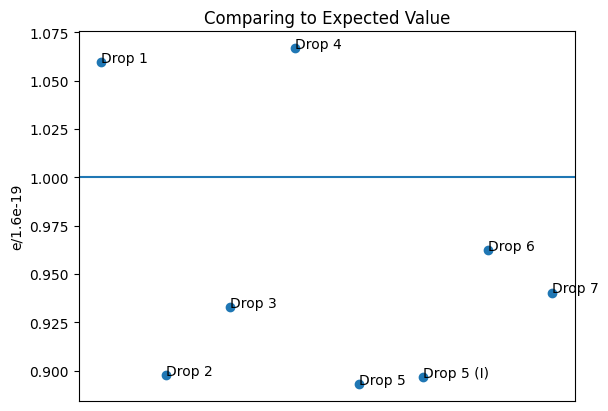

In [ ]:
# Data Plot
y = [1,2,3,4,5,6,7,8]
fig, ax = plt.subplots()
ax.scatter(y,Est_q)
ax.axhline(y=1) # Adding Horziontal Reference Line
plt.title("Comparing to Expected Value")
plt.ylabel("e/1.6e-19")
plt.xticks([])
for i, txt in enumerate(Name):   # Labelling Individual Points
    ax.annotate(txt, (y[i], Est_q[i]))

In [ ]:
# Data Analysis
  # Percentage Diff
print("Derived values % Difference")
for x in range(0,8):
  calc = 200*(abs(Est_q[x]-1))/(1+Est_q[x]) # % diff = 100 x (|A-B|)/((A+B)/2)
  print(Name[x],":",round(calc,1))

Derived values % Difference
Drop 1 : 5.8
Drop 2 : 10.8
Drop 3 : 6.9
Drop 4 : 6.5
Drop 5 : 11.3
Drop 5 (I) : 10.9
Drop 6 : 3.8
Drop 7 : 6.1


In [ ]:
#Uncertainity Calculation

#Stopwatch Measurement Uncertainity = 0.2 sec

#Velocity Uncertianities
Δv_r,Δv_f=[None]*8,[None]*8
Δv_r[0],Δv_f[0]= 6.47E-10,1.33E-10
Δv_r[1],Δv_f[1]= 4.22E-09,5.81E-11
Δv_r[2],Δv_f[2]= 2.81E-09,8.33E-11
Δv_r[3],Δv_f[3]= 3.01E-09,3.00E-11
Δv_r[4],Δv_f[4]= 9.86E-10,2.25E-10
Δv_r[5],Δv_f[5]= 2.10E-10,7.53E-11
Δv_r[6],Δv_f[6]= 2.23E-09,3.36E-10
Δv_r[7],Δv_f[7]= 1.21E-09,2.90E-10

#Charge Uncertainity Calculation
print("Oil Drop Charges (with uncertainities)")
for i in range(0,8):
  q_1 = rho*g*d/V*((v_r[i]+v_f[i])/v_f[i])                      # rho*g*d/V(v_r+v_f/v_f)
  Δq_1=q_1*((Δv_f[i]+Δv_r[i])/(v_f[i]+v_r[i])+Δv_f[i]/v_f[i])   # Uncerntainity of rho*g*d/V(v_r+v_f/v_f)

  q_2 = ((9*eta*v_f[i]/(2*rho*g))**(3/2))                       # ((9*eta/(2*rho*g))v_f)^3/2
  Δq_2=q_2*((3*Δv_f[i])/(2*v_f[i]))                             # Uncerntainity of the ((9*eta/(2*rho*g))v_f)^3/2

  Δq = (4*np.pi/3)*q1*q2*(Δq_1/q_1+Δq_2/q_2)
  print(Name[i],":",round(multi[i],3),"±",'{:.2e}'.format(Δq/q_e),"e")

Oil Drop Charges (with uncertainities)
Drop 1 : 1.06 ± 5.13e-05 e
Drop 2 : 1.795 ± 7.36e-05 e
Drop 3 : 1.866 ± 6.29e-05 e
Drop 4 : 1.067 ± 6.59e-05 e
Drop 5 : 1.786 ± 6.21e-05 e
Drop 5 (I) : 0.897 ± 3.02e-05 e
Drop 6 : 3.85 ± 7.32e-05 e
Drop 7 : 1.881 ± 7.36e-05 e
